In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords         
from nltk.tokenize import word_tokenize   
from nltk.stem import PorterStemmer       
from nltk.stem import WordNetLemmatizer   
from nltk.stem import SnowballStemmer  
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer,TfidfVectorizer
from nltk.tag import pos_tag
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas
import random
import re
from nltk.tag import StanfordNERTagger
import os
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\86134\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
df_train = pd.read_csv('C:/Users/86134/Desktop/train.csv')
df_test = pd.read_csv('C:/Users/86134/Desktop/test.csv')
submission = pd.read_csv('C:/Users/86134/Desktop/sample_submission.csv')

In [9]:
# 移除中文
def find_unchinese(file):
    pattern = re.compile(r'[\u4e00-\u9fa5]')
    unchinese = re.sub(pattern,'',file)                            
    return unchinese

In [10]:
def Extract_Noun(file):
    outstr = ''   
    sentence_depart = word_tokenize(file.strip())
    for word in sentence_depart:
        p = pos_tag(word_tokenize(word))
        # Only extract noun
        if p[0][1] == 'NN' or p[0][1] == 'NNS' or p[0][1] == 'NNP' or p[0][1] == 'NNPS':            
            outstr += word
            outstr += ' '
    return outstr


In [13]:
def stopwordslist():
    stopwords = [line.strip() for line in open('stopWord.txt',encoding='UTF-8').readlines()]
    return stopwords
stop_words = set(stopwords.words('english'))

In [14]:
wordnet_lemmatizer = WordNetLemmatizer()

In [15]:
def Data_regularization(sentence):
     # 对文档中的每一行进行分词
    print("Began to participle")
    
    sentence = Extract_Noun(sentence)
    sentence = find_unchinese(sentence)
    sentence = sentence.translate(punc_table)
    sentence_depart = word_tokenize(sentence.strip())

    # 创建一个停用词列表
    #stopwords = stopwordslist()
    # 输出结果为outstr
    outstr = ''
    # 去停用词
    for word in sentence_depart:
        if word not in stop_words:   
            if word != '\t':
                if word != '\n':                        
                    # snowball_stemmer.stem(w) Word stemming
                    word1 = wordnet_lemmatizer.lemmatize(word, pos = 'n') 
                    word2 = wordnet_lemmatizer.lemmatize(word1, pos = 'v') 
                    word3 = wordnet_lemmatizer.lemmatize(word2, pos = 'a')
                    word4 = wordnet_lemmatizer.lemmatize(word3, pos = 'r')
                    #把所有字符中的大写字母转换成小写字母
                    word = word4.lower()                 
                    outstr += word
                    outstr += ' '  
    return outstr


In [25]:
for i in range(0, df_train.shape[0]):
    s = df_train.loc[i,'full_text'].split(',')
    if len(s) != 1:
        r = random.randint(0,len(s)-1)
        df_train.loc[i,'full_text'] = s[r]
    print('The ' + str(i) + ' is successfully select')

The 0 is successfully select
The 1 is successfully select
The 2 is successfully select
The 3 is successfully select
The 4 is successfully select
The 5 is successfully select
The 6 is successfully select
The 7 is successfully select
The 8 is successfully select
The 9 is successfully select
The 10 is successfully select
The 11 is successfully select
The 12 is successfully select
The 13 is successfully select
The 14 is successfully select
The 15 is successfully select
The 16 is successfully select
The 17 is successfully select
The 18 is successfully select
The 19 is successfully select
The 20 is successfully select
The 21 is successfully select
The 22 is successfully select
The 23 is successfully select
The 24 is successfully select
The 25 is successfully select
The 26 is successfully select
The 27 is successfully select
The 28 is successfully select
The 29 is successfully select
The 30 is successfully select
The 31 is successfully select
The 32 is successfully select
The 33 is successful

The 605 is successfully select
The 606 is successfully select
The 607 is successfully select
The 608 is successfully select
The 609 is successfully select
The 610 is successfully select
The 611 is successfully select
The 612 is successfully select
The 613 is successfully select
The 614 is successfully select
The 615 is successfully select
The 616 is successfully select
The 617 is successfully select
The 618 is successfully select
The 619 is successfully select
The 620 is successfully select
The 621 is successfully select
The 622 is successfully select
The 623 is successfully select
The 624 is successfully select
The 625 is successfully select
The 626 is successfully select
The 627 is successfully select
The 628 is successfully select
The 629 is successfully select
The 630 is successfully select
The 631 is successfully select
The 632 is successfully select
The 633 is successfully select
The 634 is successfully select
The 635 is successfully select
The 636 is successfully select
The 637 

The 1167 is successfully select
The 1168 is successfully select
The 1169 is successfully select
The 1170 is successfully select
The 1171 is successfully select
The 1172 is successfully select
The 1173 is successfully select
The 1174 is successfully select
The 1175 is successfully select
The 1176 is successfully select
The 1177 is successfully select
The 1178 is successfully select
The 1179 is successfully select
The 1180 is successfully select
The 1181 is successfully select
The 1182 is successfully select
The 1183 is successfully select
The 1184 is successfully select
The 1185 is successfully select
The 1186 is successfully select
The 1187 is successfully select
The 1188 is successfully select
The 1189 is successfully select
The 1190 is successfully select
The 1191 is successfully select
The 1192 is successfully select
The 1193 is successfully select
The 1194 is successfully select
The 1195 is successfully select
The 1196 is successfully select
The 1197 is successfully select
The 1198

The 1705 is successfully select
The 1706 is successfully select
The 1707 is successfully select
The 1708 is successfully select
The 1709 is successfully select
The 1710 is successfully select
The 1711 is successfully select
The 1712 is successfully select
The 1713 is successfully select
The 1714 is successfully select
The 1715 is successfully select
The 1716 is successfully select
The 1717 is successfully select
The 1718 is successfully select
The 1719 is successfully select
The 1720 is successfully select
The 1721 is successfully select
The 1722 is successfully select
The 1723 is successfully select
The 1724 is successfully select
The 1725 is successfully select
The 1726 is successfully select
The 1727 is successfully select
The 1728 is successfully select
The 1729 is successfully select
The 1730 is successfully select
The 1731 is successfully select
The 1732 is successfully select
The 1733 is successfully select
The 1734 is successfully select
The 1735 is successfully select
The 1736

The 2283 is successfully select
The 2284 is successfully select
The 2285 is successfully select
The 2286 is successfully select
The 2287 is successfully select
The 2288 is successfully select
The 2289 is successfully select
The 2290 is successfully select
The 2291 is successfully select
The 2292 is successfully select
The 2293 is successfully select
The 2294 is successfully select
The 2295 is successfully select
The 2296 is successfully select
The 2297 is successfully select
The 2298 is successfully select
The 2299 is successfully select
The 2300 is successfully select
The 2301 is successfully select
The 2302 is successfully select
The 2303 is successfully select
The 2304 is successfully select
The 2305 is successfully select
The 2306 is successfully select
The 2307 is successfully select
The 2308 is successfully select
The 2309 is successfully select
The 2310 is successfully select
The 2311 is successfully select
The 2312 is successfully select
The 2313 is successfully select
The 2314

The 2818 is successfully select
The 2819 is successfully select
The 2820 is successfully select
The 2821 is successfully select
The 2822 is successfully select
The 2823 is successfully select
The 2824 is successfully select
The 2825 is successfully select
The 2826 is successfully select
The 2827 is successfully select
The 2828 is successfully select
The 2829 is successfully select
The 2830 is successfully select
The 2831 is successfully select
The 2832 is successfully select
The 2833 is successfully select
The 2834 is successfully select
The 2835 is successfully select
The 2836 is successfully select
The 2837 is successfully select
The 2838 is successfully select
The 2839 is successfully select
The 2840 is successfully select
The 2841 is successfully select
The 2842 is successfully select
The 2843 is successfully select
The 2844 is successfully select
The 2845 is successfully select
The 2846 is successfully select
The 2847 is successfully select
The 2848 is successfully select
The 2849

The 3309 is successfully select
The 3310 is successfully select
The 3311 is successfully select
The 3312 is successfully select
The 3313 is successfully select
The 3314 is successfully select
The 3315 is successfully select
The 3316 is successfully select
The 3317 is successfully select
The 3318 is successfully select
The 3319 is successfully select
The 3320 is successfully select
The 3321 is successfully select
The 3322 is successfully select
The 3323 is successfully select
The 3324 is successfully select
The 3325 is successfully select
The 3326 is successfully select
The 3327 is successfully select
The 3328 is successfully select
The 3329 is successfully select
The 3330 is successfully select
The 3331 is successfully select
The 3332 is successfully select
The 3333 is successfully select
The 3334 is successfully select
The 3335 is successfully select
The 3336 is successfully select
The 3337 is successfully select
The 3338 is successfully select
The 3339 is successfully select
The 3340

The 3898 is successfully select
The 3899 is successfully select
The 3900 is successfully select
The 3901 is successfully select
The 3902 is successfully select
The 3903 is successfully select
The 3904 is successfully select
The 3905 is successfully select
The 3906 is successfully select
The 3907 is successfully select
The 3908 is successfully select
The 3909 is successfully select
The 3910 is successfully select


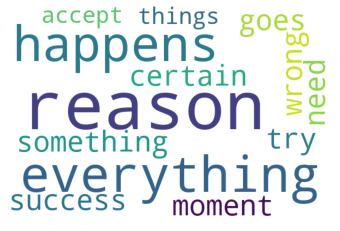

In [28]:
from wordcloud import WordCloud  # 词云库
import matplotlib.pyplot as plt

# 1.读取本地英文文本文件
text = df_train.loc[i,'full_text']
# 2.创建WordCloud实例,设置词云图宽高(最终以矩形显示)、背景颜色(默认黑色)和最大显示字数
wc = WordCloud(width=600, height=400, background_color="white", max_words=4000)
# 3.根据读取的英文文本，先分词再生成词云图
wc.generate(text)
# 4.使用matplotlib绘图
plt.imshow(wc)
plt.axis("off") # 取消坐标系
plt.show()      # 在IDE中显示图片
# 5.将生成的词云图保存在本地
wc.to_file('C:/Users/86134/Desktop/wordcloud.png')

In [37]:
pip install pyenchant

     --------------------------------------- 11.9/11.9 MB 13.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
chkr = SpellChecker("en_US")
chkr.set_text("I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go take a shower and when u get out your ready to go.when your home your comfortable and you pay attention. it gives then an advantage to be smarter and even pass there classmates on class work. public schools are difficult even if you try. some teacher dont know how to teach it in then way that students understand it. that causes students to fail and they may repeat the class.")
for err in chkr:
    print ("ERROR:", err.word)

ERROR: youll
ERROR: dont


In [66]:
outputpath='df_train'
df_train.to_csv(outputpath,sep=',',index=False,header=False)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer